<a href="https://colab.research.google.com/github/Yaoc0009/NLP-Assignment-1/blob/main/NLP_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Domain Specific Dataset Analysis

## 1. Domain: COVID-19 Research Article Abstracts
Source: COVID-19 Open Research Dataset Challenge ([CORD-19](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge)). 

CORD-19 is a resource of over 200,000 scholarly articles, including over 100,000 with full text, about COVID-19, SARS-CoV-2, and related coronaviruses. In this assignment, we will use the abstracts of these articles as a domain sepcific dataset for analysis.

In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/NLP/CORD19/metadata.csv', dtype=str).head(20)  # only interested in the first 20 papers in this exercise
df1.head(5).abstract.values  #sample

### 1a.Tokenization and Stemming

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
word_tokens = nltk.word_tokenize(df1.iloc[0].abstract)
'|'.join(word_tokens)

In [ ]:
word_tokens = nltk.word_tokenize(df1.iloc[1].abstract)
'|'.join(word_tokens)

In [ ]:
word_tokens = nltk.word_tokenize(df1.iloc[2].abstract)
'|'.join(word_tokens)

In [ ]:
word_tokens = nltk.word_tokenize(df1.iloc[3].abstract)
'|'.join(word_tokens)

In [ ]:
word_tokens = nltk.word_tokenize(df1.iloc[4].abstract)
'|'.join(word_tokens)

In [ ]:
word_tokens = nltk.word_tokenize(df1.iloc[5].abstract)
'|'.join(word_tokens)

In [ ]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
stemmed = [stemmer.stem(word) for word in word_tokens]
'|'.join(stemmed)

In [ ]:
def analyse_stem(stemmer, original):
  stemmed = [stemmer.stem(word) for word in original]
  print("Number of distinct tokens for original", len(set(original)))
  print("Number of distinct tokens for stemmed", len(set(stemmed)))
  length_dist_original = [len(word) for word in original]
  length_dist_stemmed = [len(word) for word in stemmed]

  plt.hist(length_dist_original, bins=15, alpha=0.5, label='original')
  plt.hist(length_dist_stemmed, bins=15, alpha=0.5, label='stemmed')
  plt.legend()

In [ ]:
analyse_stem(stemmer, word_tokens)

### 1b. Sentence Segmentation

In [ ]:
sent_tokens = nltk.sent_tokenize(df1.iloc[0].abstract)

In [ ]:
[len(nltk.word_tokenize(sent_token)) for sent_token in sent_tokens]

### 1c. POS Tagging

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
word_tokens = nltk.word_tokenize(sent_tokens[0])
nltk.pos_tag(word_tokens)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##2. Domain: Amazon Electronics Reviews

Source: Consumer Reviews of Amazon Products ([Datafiniti's Product Database](https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products?select=Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv)). In this assignment, we will use specifically reviews of the electronics product of the amazon products as they would have terms specific to the technology domain.

In [ ]:
df2 = pd.read_csv("/content/drive/My Drive/NLP/AmazonReviews/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv", dtype=str)

In [ ]:
df2 = df2.drop_duplicates(subset=['reviews.text'])

In [ ]:
df2 = df2.loc[df2['reviews.text'].str.len().sort_values()[-20:].index]['reviews.text']

### 2a. Tokenization and Stemming

In [ ]:
word_tokens = nltk.word_tokenize(df2.iloc[-1])
"|".join(word_tokens)

"I|'ve|had|lots|of|tablets|in|the|past|,|mostly|from|the|Samsung|line|,|but|this|is|my|first|Amazon|Fire|,|so|I|want|to|write|this|review|for|others|who|have|never|tried|one|of|these|.|At|the|time|that|this|was|written|,|Alexa|had|not|been|added|to|the|tablet.First|,|while|this|device|runs|an|Android|type|of|operating|system|,|Amazon|puts|its|own|spin|on|the|operating|system|.|I|do|n't|feel|like|I|'m|using|Android|.|This|feels|different|to|me|.|It|does|n't|have|the|same|level|of|customization|that|Android|users|have|come|to|appreciate|.|That|being|said|,|if|you|are|an|Amazon|Prime|member|,|this|device|has|been|tailored|to|be|your|content|entertainment|machine|.|It|'s|simply|a|fun|way|to|consume|your|magazines|,|books|,|etc.There|are|3|on-screen|buttons|on|the|bottom|of|the|device|.|The|middle|button|immediately|takes|you|to|your|home|screen|.|The|button|to|the|left|acts|as|a|sort|of|``|back|''|button|.|It|also|lets|me|get|rid|of|my|keyboard|when|I|do|n't|need|it|on|screen|,|but|it|'s|o

Number of distinct tokens for original 515
Number of distinct tokens for stemmed 437


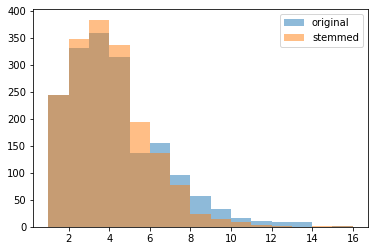

In [ ]:
analyse_stem(stemmer, word_tokens)

### 2b. Sentence Segmentation

In [ ]:
sent_tokens = nltk.sent_tokenize(df2.iloc[0])

In [ ]:
[len(nltk.word_tokenize(sent_token)) for sent_token in sent_tokens]

[24, 8, 5, 18, 10, 8, 35, 9, 9, 24, 22, 34, 27, 5, 21, 3, 1]

###2c. POS Tagging

In [ ]:
word_tokens = nltk.word_tokenize(sent_tokens[0])
nltk.pos_tag(word_tokens)

[('OK', 'UH'),
 (',', ','),
 ('I', 'PRP'),
 ('was', 'VBD'),
 ('so', 'RB'),
 ('unsure', 'JJ'),
 ('of', 'IN'),
 ('this', 'DT'),
 ('Kindle', 'NNP'),
 ('because', 'IN'),
 ('it', 'PRP'),
 ('does', 'VBZ'),
 ('not', 'RB'),
 ('have', 'VB'),
 ('all', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('bells', 'NNS'),
 ('and', 'CC'),
 ('whistles', 'NNS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('others', 'NNS'),
 ('.', '.')]

##3. Domain: World Financial News

Source: Sun, J. (2016, August). Daily News for Stock Market Prediction, Version 1. Retrieved 18th October 2020 from https://www.kaggle.com/aaron7sun/stocknews.
Historical news headlines was crawled from Reddit WorldNews Channel (/r/worldnews). They are ranked by reddit users' votes, and only the top 25 headlines are considered for a single date.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stockerbot-export.csv to stockerbot-export.csv


In [ ]:
from pandas import DataFrame

fintweets = pd.read_csv('stockerbot-export.csv', dtype=str,warn_bad_lines=True, error_bad_lines=False)

b'Skipping line 731: expected 8 fields, saw 13\nSkipping line 2836: expected 8 fields, saw 15\nSkipping line 3058: expected 8 fields, saw 12\nSkipping line 3113: expected 8 fields, saw 12\nSkipping line 3194: expected 8 fields, saw 17\nSkipping line 3205: expected 8 fields, saw 17\nSkipping line 3255: expected 8 fields, saw 17\nSkipping line 3520: expected 8 fields, saw 17\nSkipping line 4078: expected 8 fields, saw 17\nSkipping line 4087: expected 8 fields, saw 17\nSkipping line 4088: expected 8 fields, saw 17\nSkipping line 4499: expected 8 fields, saw 12\n'


In [ ]:
df3 = fintweets['text'].head(150)
df3

0      VIDEO: “I was in my office. I was minding my o...
1      The price of lumber $LB_F is down 22% since hi...
2      Who says the American Dream is dead? https://t...
3      Barry Silbert is extremely optimistic on bitco...
4      How satellites avoid attacks and space junk wh...
                             ...                        
145    Mettler-Toledo International $MTD &amp; Quante...
146    RT @beep_eminent: $EMN Eminent Token FUEL for ...
147    RT @beep_eminent: The $EMN EMINENT token which...
148    Head-To-Head Comparison: Quanterix $QTRX vs. M...
149    Nuance Communications $NUAN Upgraded by ValuEn...
Name: text, Length: 150, dtype: object

### 3a. Tokenization and Stemming

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
word_tokens = []
for i in range(df3.shape[0]):
  word_tokens = word_tokens + nltk.word_tokenize(df3[i])
"|".join(word_tokens)

"VIDEO|:|“|I|was|in|my|office|.|I|was|minding|my|own|business|...|”|–David|Solomon|tells|$|GS|interns|how|he|learned|he|wa…|https|:|//t.co/QClAITywXV|The|price|of|lumber|$|LB_F|is|down|22|%|since|hitting|its|YTD|highs|.|The|Macy|'s|$|M|turnaround|is|still|happening.…|https|:|//t.co/XnKsV4De39|Who|says|the|American|Dream|is|dead|?|https|:|//t.co/CRgx19x7sA|Barry|Silbert|is|extremely|optimistic|on|bitcoin|--|but|predicts|that|99|%|of|new|crypto|entrants|are|“|going|to|zero…|https|:|//t.co/mGMVo2cZgY|How|satellites|avoid|attacks|and|space|junk|while|circling|the|Earth|https|:|//t.co/aHzIV3Lqp5|#|paid|@|Oracle|https|:|//t.co/kacpqZWiDJ|.|@|RealMoney|'s|David|Butler|'s|favorite|FANG|stock|is|n't|#|RealMoneySOD|Alphabet|but|Facebook|https|:|//t.co/MczAPSFjOi|Don|’|t|miss|my|convo|with|one|of|my|favorite|thinkers|@|SamHarrisOrg|!|https|:|//t.co/uuPVxIobCh|U.S.|intelligence|documents|on|Nelson|Mandela|made|public|https|:|//t.co/XTnEfo1rO6|https|:|//t.co/V8DXkWDQ6R|Senate|wants|emergency|alerts

In [ ]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
stemmed = [stemmer.stem(word) for word in word_tokens]
'|'.join(stemmed)

"video|:|“|i|was|in|my|offic|.|i|was|mind|my|own|busi|...|”|–david|solomon|tell|$|gs|intern|how|he|learn|he|wa…|https|:|//t.co/qclaitywxv|the|price|of|lumber|$|lb_f|is|down|22|%|sinc|hit|it|ytd|high|.|the|maci|'s|$|m|turnaround|is|still|happening.…|https|:|//t.co/xnksv4de39|who|say|the|american|dream|is|dead|?|https|:|//t.co/crgx19x7sa|barri|silbert|is|extrem|optimist|on|bitcoin|--|but|predict|that|99|%|of|new|crypto|entrant|are|“|go|to|zero…|https|:|//t.co/mgmvo2czgi|how|satellit|avoid|attack|and|space|junk|while|circl|the|earth|https|:|//t.co/ahziv3lqp5|#|paid|@|oracl|https|:|//t.co/kacpqzwidj|.|@|realmoney|'s|david|butler|'s|favorit|fang|stock|is|n't|#|realmoneysod|alphabet|but|facebook|https|:|//t.co/mczapsfjoi|don|’|t|miss|my|convo|with|one|of|my|favorit|thinker|@|samharrisorg|!|https|:|//t.co/uupvxiobch|u.s.|intellig|document|on|nelson|mandela|made|public|https|:|//t.co/xtnefo1ro6|https|:|//t.co/v8dxkwdq6r|senat|want|emerg|alert|to|go|out|through|netflix|spotifi|etc|.|https|:|//t

In [ ]:
def analyse_stem(stemmer, original_):
  length_dist_original = []
  length_dist_stemmed = []
  for original in original_:
    original = nltk.word_tokenize(original)
    stemmed = [stemmer.stem(word) for word in original]
    #print("Number of distinct tokens for original", len(set(original)))
    #print("Number of distinct tokens for stemmed", len(set(stemmed)))
    length_dist_original.extend([len(word) for word in original])
    length_dist_stemmed.extend([len(word) for word in stemmed])

  print("Original Average:", sum(length_dist_original)/len(length_dist_original))
  print("Stemmed Average:", sum(length_dist_stemmed)/len(length_dist_stemmed))

  plt.hist(length_dist_original, bins=20, alpha=0.5, label='original')
  plt.hist(length_dist_stemmed, bins=20, alpha=0.5, label='stemmed')
  plt.legend()
  plt.xlabel('Length of a token in number of characters')
  plt.ylabel('Number of tokens')   
  plt.title('Effect of stemming on Finance Tweets tokens')

Original Average: 4.148849402854646
Stemmed Average: 3.888435770463152


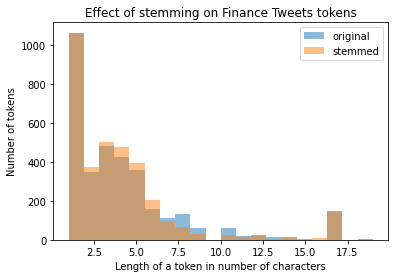

In [ ]:
analyse_stem(stemmer, word_tokens)

### 3b. Sentence Segmentation

In [ ]:
sent_tokens = nltk.sent_tokenize(df3.iloc[3])

In [ ]:
[len(nltk.word_tokenize(sent_token)) for sent_token in sent_tokens]

[25]

#3c. POS Tagging

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
word_tokens = nltk.word_tokenize(sent_tokens[1])
nltk.pos_tag(word_tokens)